In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력

In [3]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

### 데이터 살펴보기

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [5]:
train.country

0        USA
1        USA
2        NLD
3        USA
4        ITA
5        USA
6        USA
7        NLD
8        USA
9        ARE
10       DNK
11       GRC
12       USA
13       USA
14       USA
15       QAT
16       GBR
17       ROU
18       GBR
19       USA
20       USA
21       HUN
22       USA
23       USA
24       AUS
25       USA
26       AUS
27       USA
28       POL
29       USA
30       USA
31       CAN
32       AUS
33       AUS
34       USA
35       ARG
36       USA
37       FRA
38       ITA
39       USA
40       GBR
41       NLD
42       AUS
43       USA
44       USA
45       DEU
46       ITA
47       GBR
48       USA
49       USA
50       USA
51       USA
52       UKR
53       ITA
54       BGR
55       PAK
56       EST
57       USA
58       USA
59       AUS
60       PHL
61       USA
62       USA
63       USA
64       NLD
65       SVN
66       NaN
67       SRB
68       NZL
69       USA
70       DEU
71       USA
72       AUS
73       USA
74       SWE
75       CAN
76       AUS

### 라벨의 수 확인

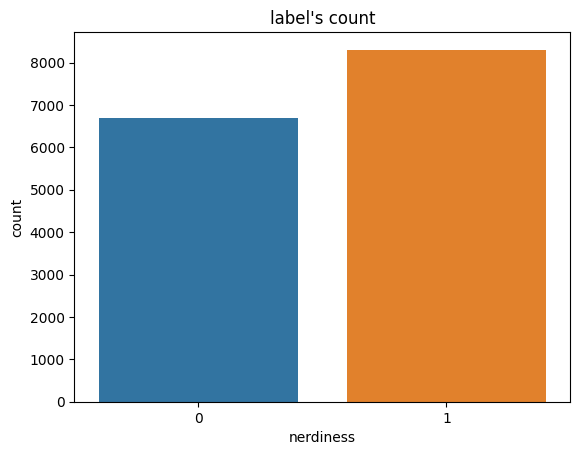

In [6]:
sns.countplot(x='nerdiness',data=train)
plt.title("label's count")
plt.show()

### 결측치 체크

In [7]:
train.isnull().sum()

Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q7               76
Q8               48
Q9               56
Q10              72
Q11              59
Q12              67
Q13              40
Q14              36
Q15              45
Q16              33
Q17              37
Q18              63
Q19              53
Q20              45
Q21              39
Q22              38
Q23              50
Q24              61
Q25              44
Q26              68
country         190
introelapse       0
testelapse        0
surveyelapse      0
TIPI1            53
TIPI2            66
TIPI3            79
TIPI4            64
TIPI5            70
TIPI6            62
TIPI7            64
TIPI8            65
TIPI9            64
TIPI10           80
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0
VCL10             0


In [8]:
test.isnull().sum()

Q1              119
Q2              147
Q3              130
Q4              125
Q5               90
Q6              132
Q7              142
Q8              108
Q9              104
Q10             220
Q11             119
Q12             149
Q13              96
Q14             102
Q15             107
Q16              85
Q17              79
Q18             147
Q19              97
Q20             119
Q21             123
Q22              82
Q23             114
Q24             125
Q25             108
Q26             108
country         450
introelapse       0
testelapse        0
surveyelapse      0
TIPI1           107
TIPI2           122
TIPI3           163
TIPI4           138
TIPI5           140
TIPI6           128
TIPI7           134
TIPI8           127
TIPI9           130
TIPI10          176
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0
VCL10             0


#### 결측치 시각화

<AxesSubplot: >

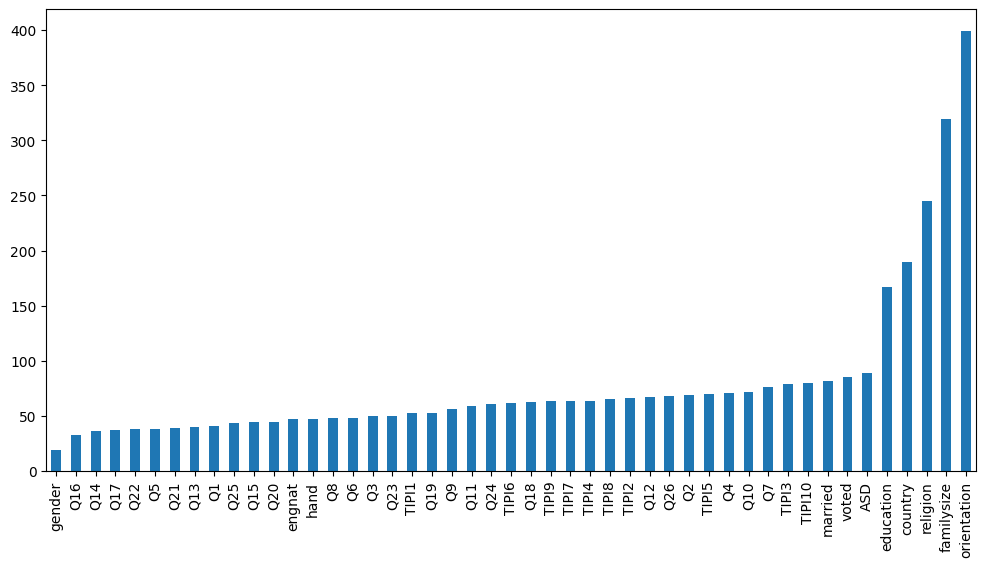

In [9]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

<AxesSubplot: >

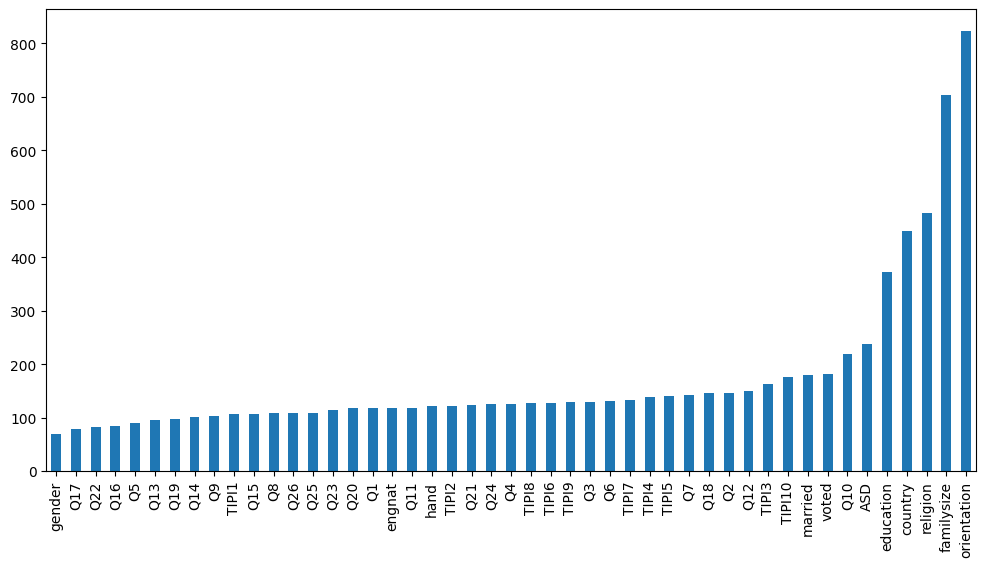

In [10]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar(figsize = (12,6))

### 결측치 수정

In [11]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

In [12]:
train.country.value_counts()

USA    7419
GBR    1109
CAN     915
AUS     525
DEU     473
PHL     261
BRA     240
IND     233
POL     210
FRA     208
ITA     186
NLD     175
SWE     152
MEX     136
FIN     133
NZL     124
MYS     121
IDN     110
NOR     106
SGP     102
ESP      94
DNK      91
ROU      87
IRL      79
ARG      74
PRT      73
TUR      70
RUS      63
CZE      62
HUN      56
BEL      55
GRC      54
ZAF      52
CHL      49
AUT      48
CHE      47
ISR      44
SRB      38
HRV      35
JPN      32
HKG      31
THA      30
BGR      30
ARE      28
PAK      27
UKR      22
SVN      21
KOR      21
LTU      20
LVA      20
SVK      19
VEN      17
COL      16
PRI      15
KEN      15
PER      15
URY      14
CRI      14
SAU      12
EST      12
VNM      12
IRN      11
BIH      11
TWN      11
EGY      10
JOR      10
HND       9
KWT       9
ALB       8
NGA       8
CHN       8
ISL       8
QAT       8
JAM       7
TTO       7
DOM       6
MKD       5
BGD       5
BHS       4
BHR       4
GEO       4
GHA       4
GUM       4
ECU 

In [13]:
con5 = train.country.value_counts().keys()[:5]
con5

Index(['USA', 'GBR', 'CAN', 'AUS', 'DEU'], dtype='object')

In [14]:
for i in range(len(train['country'])):
    if train['country'][i] not in con5 or train['country'][i]==0:
        train['country'][i] = train['country'].mode()[0]

C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2304083027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['country'][i] = train['country'].mode()[0]
C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2304083027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['country'][i] = train['country'].mode()[0]
C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2304083027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [15]:
for i in range(len(test['country'])):
    if test['country'][i] not in con5 or test['country'][i]==0:
        test['country'][i] = train['country'].mode()[0]

C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2879719941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['country'][i] = train['country'].mode()[0]
C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2879719941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['country'][i] = train['country'].mode()[0]
C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2879719941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
# for i in missing.index:
#     train[i] = train[i].fillna(0) #0도 선택문항에 존재

# for i in missing_test.index:
#     train[i] = test[i].fillna(0) #0도 선택문항에 존재

### 결측치 확인

In [17]:
train.isnull().sum()

Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q7               76
Q8               48
Q9               56
Q10              72
Q11              59
Q12              67
Q13              40
Q14              36
Q15              45
Q16              33
Q17              37
Q18              63
Q19              53
Q20              45
Q21              39
Q22              38
Q23              50
Q24              61
Q25              44
Q26              68
country           0
introelapse       0
testelapse        0
surveyelapse      0
TIPI1            53
TIPI2            66
TIPI3            79
TIPI4            64
TIPI5            70
TIPI6            62
TIPI7            64
TIPI8            65
TIPI9            64
TIPI10           80
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0
VCL10             0


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35452 entries, 0 to 35451
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            35333 non-null  float64
 1   Q2            35305 non-null  float64
 2   Q3            35322 non-null  float64
 3   Q4            35327 non-null  float64
 4   Q5            35362 non-null  float64
 5   Q6            35320 non-null  float64
 6   Q7            35310 non-null  float64
 7   Q8            35344 non-null  float64
 8   Q9            35348 non-null  float64
 9   Q10           35232 non-null  float64
 10  Q11           35333 non-null  float64
 11  Q12           35303 non-null  float64
 12  Q13           35356 non-null  float64
 13  Q14           35350 non-null  float64
 14  Q15           35345 non-null  float64
 15  Q16           35367 non-null  float64
 16  Q17           35373 non-null  float64
 17  Q18           35305 non-null  float64
 18  Q19           35355 non-nu

### one_hot

In [19]:
corr = train.corr()
corr.nerdiness

C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_4568\2255918536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


Q1              0.287806
Q2              0.264779
Q3              0.207495
Q4              0.267877
Q5              0.236608
Q6              0.311261
Q7              0.206354
Q8              0.230176
Q9              0.226568
Q10             0.188028
Q11             0.218110
Q12             0.245990
Q13             0.217883
Q14             0.232157
Q15             0.252817
Q16             0.177313
Q17             0.209167
Q18             0.184711
Q19             0.158577
Q20             0.216475
Q21             0.162039
Q22             0.162428
Q23             0.201976
Q24             0.233227
Q25             0.179885
Q26             0.245258
introelapse     0.008319
testelapse      0.005550
surveyelapse    0.011953
TIPI1          -0.103434
TIPI2           0.023593
TIPI3           0.034856
TIPI4           0.043339
TIPI5           0.033092
TIPI6           0.090820
TIPI7           0.035121
TIPI8           0.033955
TIPI9          -0.019146
TIPI10         -0.095491
VCL1            0.035160


In [20]:
corr.nerdiness.mean()
corr_top = corr.nerdiness[corr.nerdiness>corr.nerdiness.mean()]
corr_top

Q1           0.287806
Q2           0.264779
Q3           0.207495
Q4           0.267877
Q5           0.236608
Q6           0.311261
Q7           0.206354
Q8           0.230176
Q9           0.226568
Q10          0.188028
Q11          0.218110
Q12          0.245990
Q13          0.217883
Q14          0.232157
Q15          0.252817
Q16          0.177313
Q17          0.209167
Q18          0.184711
Q19          0.158577
Q20          0.216475
Q21          0.162039
Q22          0.162428
Q23          0.201976
Q24          0.233227
Q25          0.179885
Q26          0.245258
nerdiness    1.000000
Name: nerdiness, dtype: float64

In [21]:
sel = ['VCL1','VCL2','VCL3','VCL4','VCL5','VCL7','VCL8','VCL10','VCL11','VCL13','VCL14','VCL15','VCL16']
train = train.drop(sel,axis = 1)

test = test.drop(sel,axis = 1)

In [22]:
from pycaret.classification import *

model = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023)

In [23]:
Top3 = compare_models(sort='Accuracy',n_select=3)

In [24]:
tuned_top3 = [tune_model(i) for i in Top3]

In [25]:
blended = blend_models(estimator_list=tuned_top3,fold=5,method='soft')

In [26]:
pred_holdout= predict_model(blended)

In [27]:
final_model = finalize_model(blended)

In [28]:
predictions = predict_model(final_model, data = test)

In [29]:
predictions['Score']

0        0.5519
1        0.8393
2        0.8884
3        0.6261
4        0.7777
          ...  
35447    0.8225
35448    0.7998
35449    0.9133
35450    0.6158
35451    0.6778
Name: Score, Length: 35452, dtype: float64

In [30]:
predictions['Label']

0        0
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    0
35451    1
Name: Label, Length: 35452, dtype: int32

In [31]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [32]:
predictions['Score']

0        0.4481
1        0.8393
2        0.8884
3        0.6261
4        0.7777
          ...  
35447    0.8225
35448    0.7998
35449    0.9133
35450    0.3842
35451    0.6778
Name: Score, Length: 35452, dtype: float64

In [33]:
sub = predictions['Score']

In [34]:
sub

0        0.4481
1        0.8393
2        0.8884
3        0.6261
4        0.7777
          ...  
35447    0.8225
35448    0.7998
35449    0.9133
35450    0.3842
35451    0.6778
Name: Score, Length: 35452, dtype: float64

In [35]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [36]:
submission

index  nerdiness
0          0     0.4481
1          1     0.8393
2          2     0.8884
3          3     0.6261
4          4     0.7777
...      ...        ...
35447  35447     0.8225
35448  35448     0.7998
35449  35449     0.9133
35450  35450     0.3842
35451  35451     0.6778

[35452 rows x 2 columns]

In [37]:
submission.to_csv("./submit/submit4.csv", index = False)